### quest
- 주차별 환자 입원/퇴원 추이 시각화
- 요일별 환자 입원/퇴원 추이 시각화

### 분석 결론 
- 주자별 입/퇴원 
    - 2019년~2020년도에 환자 입/퇴원 비율이 눈에띄게 많아짐을 알수 있음
    - 입원 비율을 매년 중반에 많은 비중을 차지하고 있음 
    - 퇴원 비율은 매년 하반기에 많은 비중을 차지하고 있음을 확인함.
- 요일별 입/퇴원
    - 입원 비율은 주말보다는 평일에 눈에 띄게 많음을 알수 있으며, 특히 목요일이 가장 많은 비중을 차지함 
    - 퇴원 비율을 일요일, 월요일이 비중이 현저히 적음을 알수 있으며, 나머지 요일을 골고루 분포되었음을 확임함.

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [5]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [6]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [7]:
df_ROS[['입원일자','퇴원일자']] = df_ROS[['입원일자','퇴원일자']].astype(str)

In [8]:
df_ROS['입원일자_datetime']= pd.to_datetime(df_ROS['입원일자'])
df_ROS['입원일자_datetime']

0      2019-07-13
1      2019-07-15
2      2019-07-29
3      2019-07-31
4      2019-09-03
          ...    
1889   2017-04-07
1890   2017-04-26
1891   2017-04-10
1892   2017-04-08
1893   2017-04-12
Name: 입원일자_datetime, Length: 1894, dtype: datetime64[ns]

In [9]:
df_ROS['퇴원일자_datetime']= pd.to_datetime(df_ROS['퇴원일자'])
df_ROS['퇴원일자_datetime']

0      2019-07-16
1      2019-07-16
2      2019-08-01
3      2019-08-03
4      2019-09-07
          ...    
1889   2017-04-08
1890   2017-04-29
1891   2017-04-12
1892   2017-04-11
1893   2017-04-13
Name: 퇴원일자_datetime, Length: 1894, dtype: datetime64[ns]

In [7]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', '입원일자_datetime',
       '퇴원일자_datetime'],
      dtype='object')

In [33]:
df_ROS['입원일자_datetime_week']= df_ROS['입원일자_datetime'].dt.weekofyear

C:\Users\02-19\AppData\Local\Temp\ipykernel_4532\84601750.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['입원일자_datetime_week']= df_ROS['입원일자_datetime'].dt.weekofyear


In [34]:
df_ROS['퇴원일자_datetime_week']= df_ROS['퇴원일자_datetime'].dt.weekofyear

C:\Users\02-19\AppData\Local\Temp\ipykernel_4532\1985224293.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['퇴원일자_datetime_week']= df_ROS['퇴원일자_datetime'].dt.weekofyear


In [23]:
pd.pivot_table(data=df_ROS, index=['입원일자_datetime'], values='입원일자_datetime_week', aggfunc=sum)

,입원일자_datetime_week
입원일자_datetime,
2009-01-20,4
2009-01-30,5
2009-03-10,11
2009-03-27,13
2009-03-31,28
...,...
2020-07-28,62
2020-07-29,93
2020-07-30,62


In [24]:
pd.pivot_table(data=df_ROS, index=['퇴원일자_datetime'], values='퇴원일자_datetime_week', aggfunc=sum)

,퇴원일자_datetime_week
퇴원일자_datetime,
2009-01-24,4
2009-03-12,11
2009-03-28,13
2009-04-01,14
2009-04-02,14
...,...
2020-07-30,124
2020-07-31,31
2020-08-01,124


##### 주차별 퇴원일자 시각화

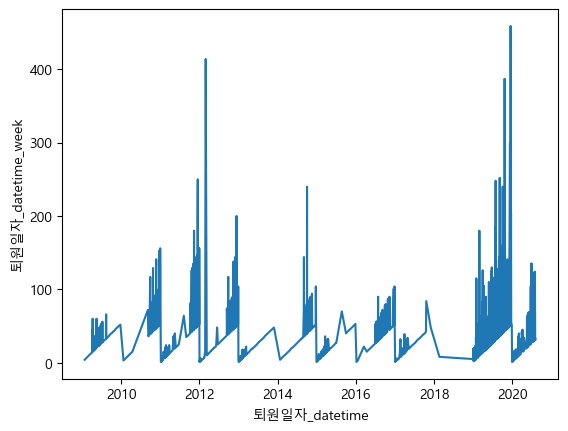

In [15]:
sns.lineplot(data=df_ROS,  x='퇴원일자_datetime', y='퇴원일자_datetime_week', estimator=sum)
plt.show()

##### 주차별 입원일자 시각화

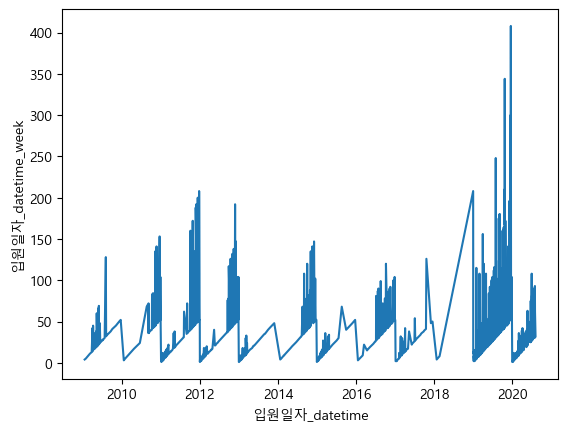

In [25]:
sns.lineplot(data=df_ROS,  x='입원일자_datetime', y='입원일자_datetime_week', estimator=sum)
plt.show()

#### 요일별 환자 입/퇴원 추이 시각화 

In [35]:
df_ROS['입원일자_datetime_day']= df_ROS['입원일자_datetime'].dt.day_name()

In [36]:
df_ROS['퇴원일자_datetime_day']= df_ROS['퇴원일자_datetime'].dt.day_name()

##### 요일별 입원 추이 시각화

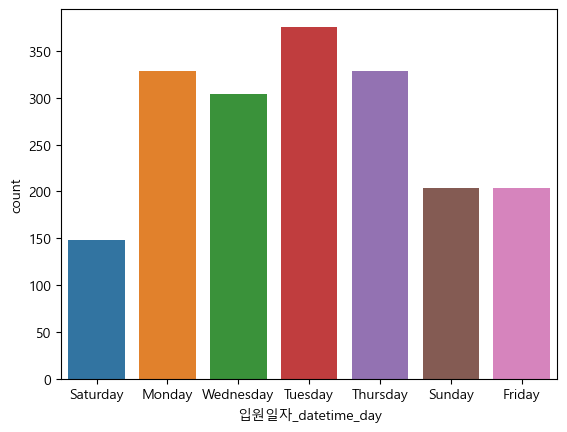

In [29]:
sns.countplot(data=df_ROS, x='입원일자_datetime_day')
plt.show()

##### 요일별 퇴원 추이 시각화 

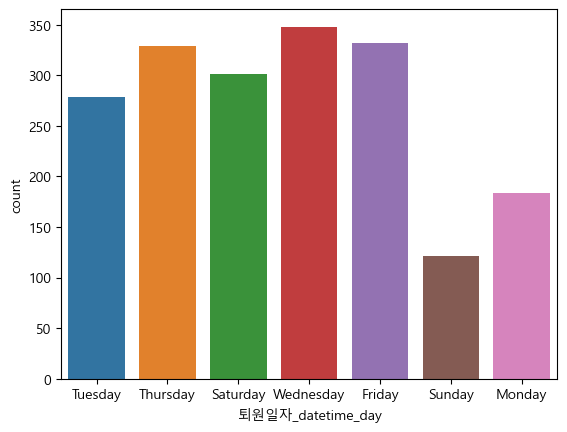

In [30]:
sns.countplot(data=df_ROS, x='퇴원일자_datetime_day')
plt.show()

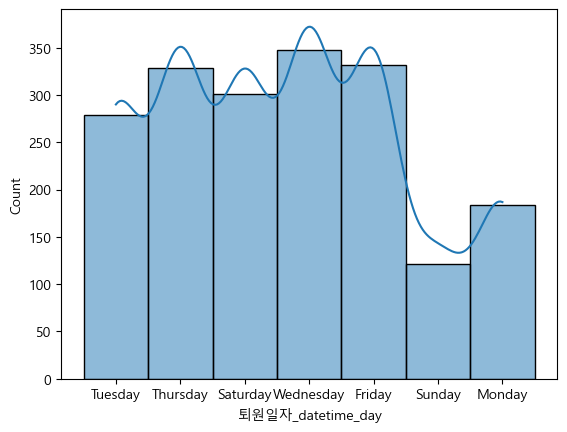

In [32]:
sns.histplot(data=df_ROS, x='퇴원일자_datetime_day', kde=True)
plt.show()